In [1]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)

#print(model.summary())

imageOrig = load_img('D:/Master Thesis/IMG_2729.JPG', target_size=(224, 224))
imageArr = img_to_array(imageOrig)  #output Numpy-array

imageReshaped = imageArr.reshape((1, imageArr.shape[0], imageArr.shape[1], imageArr.shape[2]))

image = preprocess_input(imageReshaped)
predictions = model.predict(imageReshaped)
labels = decode_predictions(predictions, 15)

Using TensorFlow backend.


In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import pyplot as plt
from numpy import float32

def createImageGrid(camImages, imgNames, predictions):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,16))
    fig.tight_layout(pad=3.0)
    
    ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()
    
    grid = [ax1, ax3, ax4, ax5, ax6]

    columns = ('Id', 'Klasse', 'Wahrscheinlichkeit')
    ax2.axis('off')
    ax2.axis('tight')
    ax2.margins(x=0.1, y=0.05)

    formattedData = [["%.2f%%" % (x*100) if isinstance(x,float32) else (x.title().replace('_', ' ') if isinstance(x,str) else x) for x in i] for i in predictions]
    
    the_table = ax2.table(cellText=formattedData, colLabels=columns, loc='center', cellLoc='left', colLoc='left')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(12)
    the_table.scale(1.2, 1.2)
    for c in the_table.get_celld().values():
        c.visible_edges = 'horizontal'
        c.set_height(.11)
    
    i = 0
    for ax in grid:
        # Iterating over the grid returns the Axes.
        ax.set_xticks([])
        ax.set_yticks([])
        ax.margins(x=0.1, y=0.05)
        ax.set_aspect('equal')
        label = imgNames[i]
        if i >= 0:
            ax.set_title(label, fontsize=20)
        ax.imshow(camImages[i])
        i = i + 1

    plt.show()

In [5]:
import numpy as np
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.gradients_inputs import GradientsInputs
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
from skimage.segmentation import mark_boundaries
import lime 
from lime import lime_image

def generateExplainerImages(imageOrig, model, class_index):
    images = [imageOrig]
    
    gradCamExplainer = GradCAM()
    images.append(
        gradCamExplainer.explain(class_index=class_index, model= model, layer_name= 'block5_conv3', validation_data= (np.array([imageArr]), None))
    )
    
    
    gradientsInputsExplainer = GradientsInputs()
    images.append(
        gradientsInputsExplainer.explain(class_index=class_index, model= model, validation_data= (np.array([imageArr]), None))
    )
    
    occlusionSensitivityExplainer = OcclusionSensitivity()
    images.append(
        occlusionSensitivityExplainer.explain(class_index=class_index, model= model, validation_data= (np.array([imageArr]), None), patch_size=40)
    ) 
    
    #LimeExplainer = lime_image.LimeImageExplainer()
    #explanation = LimeExplainer.explain_instance(np.vstack([imageArr]), model.predict, top_labels=1, hide_color=0, num_samples=1000)
    #temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
    #images.append(mark_boundaries(temp / 2 + 0.5, mask))
    
    return images

IndexError: list index out of range

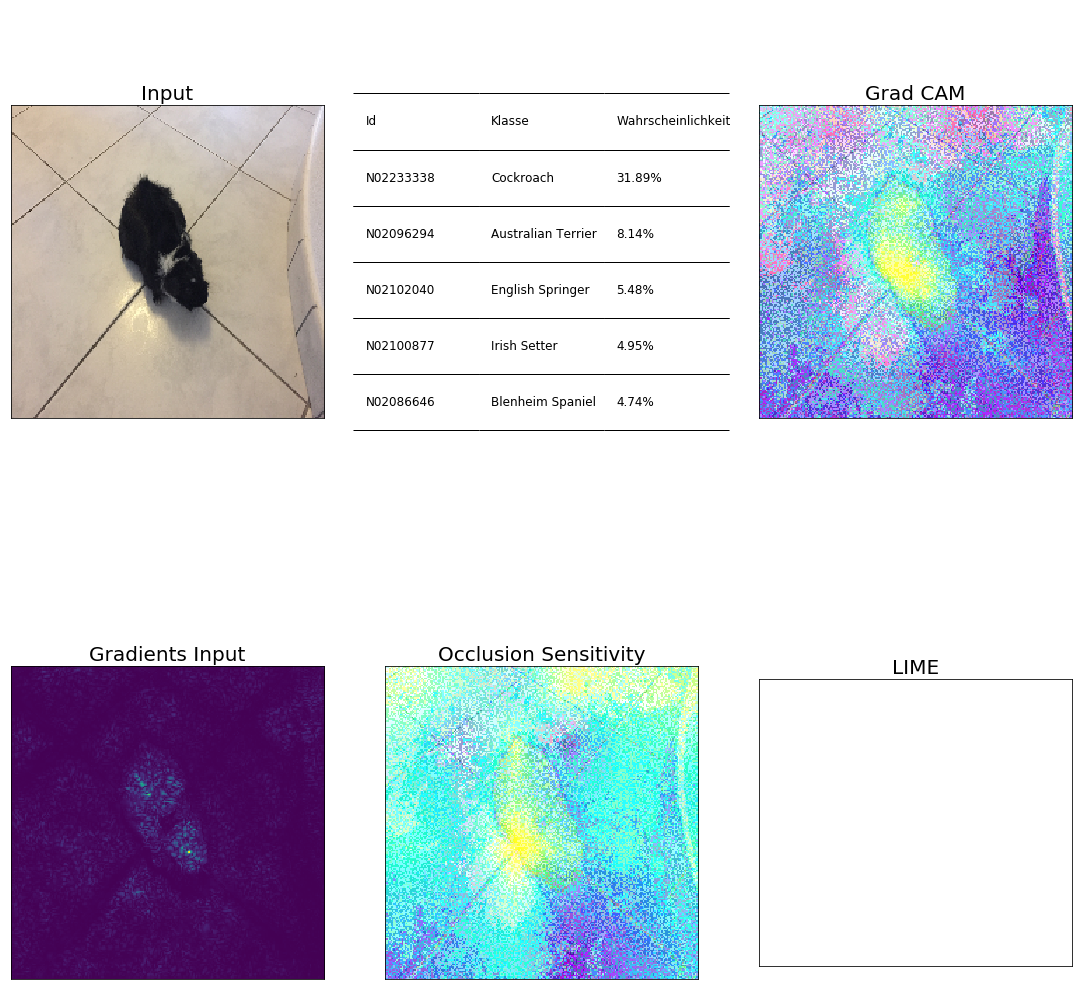

In [6]:
createImageGrid(generateExplainerImages(imageOrig, model, 1), ['Input','Grad CAM','Gradients Input','Occlusion Sensitivity','LIME'], labels[0][:5])